In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings(action= 'ignore')

In [2]:
# Navigate to project folder
project_folder = os.path.dirname(os.getcwd())

#Moving to data folder
data_folder = os.path.join(project_folder, 'data')
csv_file_path = os.path.join(data_folder, 'marketing_campaign.csv')

df = pd.read_csv(csv_file_path , delimiter= ";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
#Dt_customes is date type so we need to convert this to data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [6]:
#Finding and fixing null values
print("Finding null values\n=======================")
df.isna().sum()

Finding null values


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 null values in Income column so we need to resolve it.Here we cant replace the null values of income by the mean value so we are droping the null value

In [7]:
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
#Finding and fixing duplicate values
print("Detecting duplicate values\n==========================")
print(f'No of duplicate values:{df.duplicated().sum()}')

Detecting duplicate values
No of duplicate values:0


In [9]:
#Finding the unique values in the object column
print("Unique values in object columns\n===============================")
object_columns = [i for i in df.columns if df[i].dtype == "O"]
for i in object_columns:
    print(f'{i} : {df[i].unique()}')

Unique values in object columns
Education : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [10]:
#Describing all the integer and float columns
print("Describe the Numerical Columns\n==============================")
df.describe()

Describe the Numerical Columns


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


								Ouliter in Numerical Columns


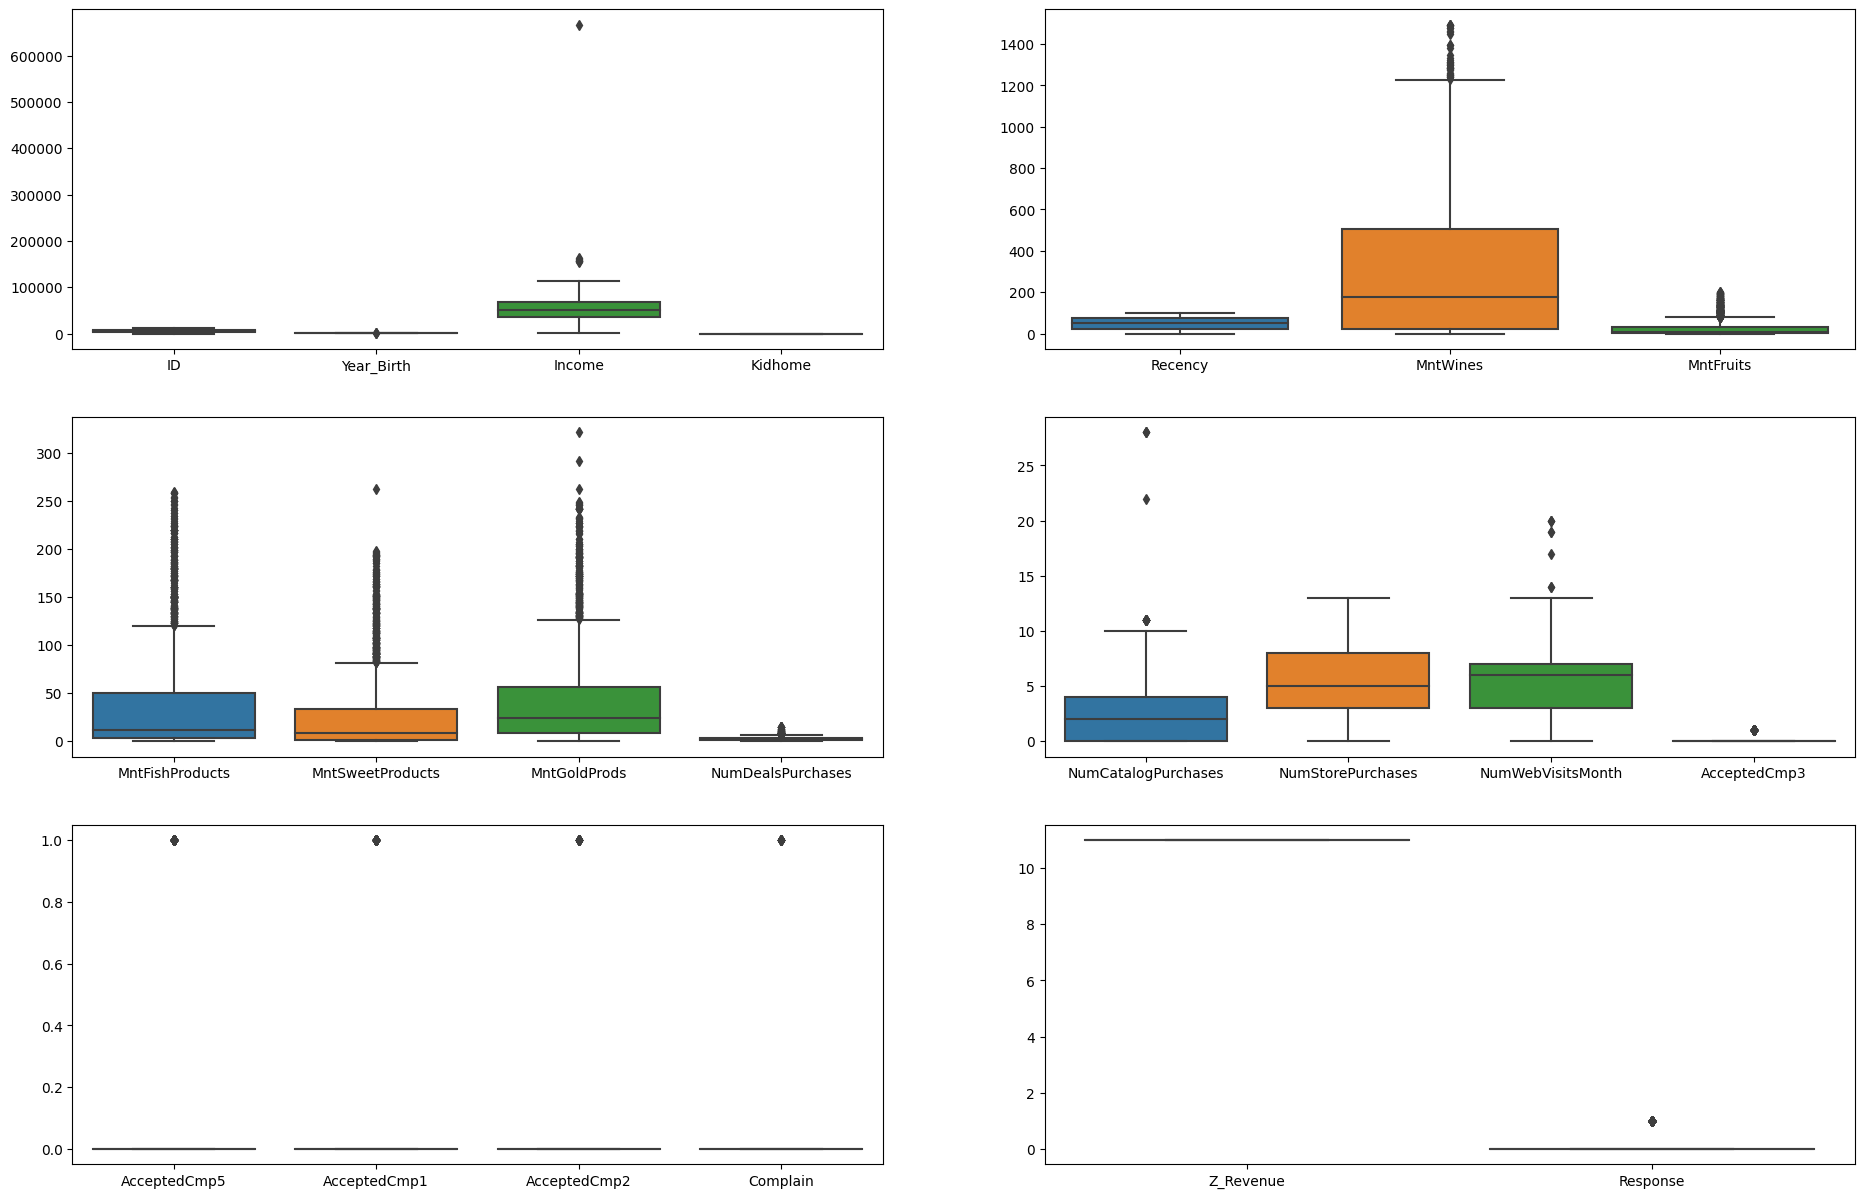

In [11]:

#OUtlier detection
print("\t\t\t\t\t\t\t\tOuliter in Numerical Columns\n\t\t\t\t\t\t\t       ==============================")
data = df.drop(object_columns, axis= 1)
fig , axes = plt.subplots(nrows = 3 , ncols = 2 , figsize = (23, 15))

sns.boxplot(data = data.iloc[:,0:4] , ax = axes[0,0])
sns.boxplot(data = data.iloc[:,5:9] , ax = axes[0,1])
sns.boxplot(data = data.iloc[:,10:14] , ax = axes[1,0])
sns.boxplot(data = data.iloc[:,15:19] , ax = axes[1,1])
sns.boxplot(data = data.iloc[:,20:24] , ax = axes[2,0])
sns.boxplot(data = data.iloc[:,25:29] , ax = axes[2,1])

plt.show()

There are outlier in multiple columns so we need to handle them


In [12]:
from sklearn.impute import SimpleImputer

#Handle the numerical columns
imputer = SimpleImputer(strategy='median')
data = pd.DataFrame(imputer.fit_transform(df.select_dtypes(exclude=['O' ,'datetime64[ns]'])))

#Handle the Categorical columns
imputer = SimpleImputer(strategy='most_frequent')
data_cat = pd.DataFrame(imputer.fit_transform(df.select_dtypes(exclude= ['number' , 'datetime64[ns]'])))

#Column names
data.columns = df.select_dtypes(exclude=['O' ,'datetime64[ns]']).columns
data_cat.columns = df.select_dtypes(include = 'O').columns

final = pd.concat([data , data_cat,df['Dt_Customer']] , axis= 1)
final = final.dropna()
final.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,3.0,11.0,1.0,Graduation,Single,2012-09-04
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Graduation,Single,2014-03-08
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Graduation,Together,2013-08-21
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Graduation,Together,2014-02-10
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,PhD,Married,2014-01-19


In [13]:
def outliers_removal(numerical_missing):
    for column in numerical_missing:
        sort=np.sort(numerical_missing[column])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detected_outliers=numerical_missing.iloc[np.where((numerical_missing[column]>upper_limit) | (numerical_missing[column]<lower_limit))]
        return detected_outliers

In [14]:
outliers_data=outliers_removal(final)
outliers_data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
33,10738.0,1951.0,49389.0,1.0,1.0,55.0,40.0,0.0,19.0,2.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Master,Single,2012-10-29
35,10755.0,1976.0,23718.0,1.0,0.0,76.0,6.0,3.0,14.0,15.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2n Cycle,Married,2013-08-29
84,11178.0,1972.0,42394.0,1.0,0.0,69.0,15.0,2.0,10.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Master,Single,2014-02-25
88,11100.0,1972.0,51813.0,1.0,1.0,37.0,51.0,2.0,7.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Graduation,Divorced,2014-05-12
100,10991.0,1960.0,89058.0,0.0,0.0,18.0,454.0,194.0,106.0,31.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Master,Married,2013-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,11187.0,1978.0,26487.0,1.0,0.0,23.0,2.0,8.0,10.0,12.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Basic,Single,2012-10-11
2174,10722.0,1973.0,55593.0,0.0,1.0,63.0,293.0,8.0,124.0,11.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Graduation,Together,2014-03-10
2178,10968.0,1969.0,57731.0,0.0,1.0,0.0,266.0,21.0,300.0,65.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,Graduation,Single,2013-01-07
2179,11133.0,1973.0,48432.0,0.0,1.0,3.0,322.0,3.0,50.0,4.0,...,0.0,0.0,0.0,0.0,3.0,11.0,1.0,PhD,YOLO,2013-10-24


All rows and columns are inside the upper and lower limit therefore no outlier we can proceed to further process

Count of Education by each level
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


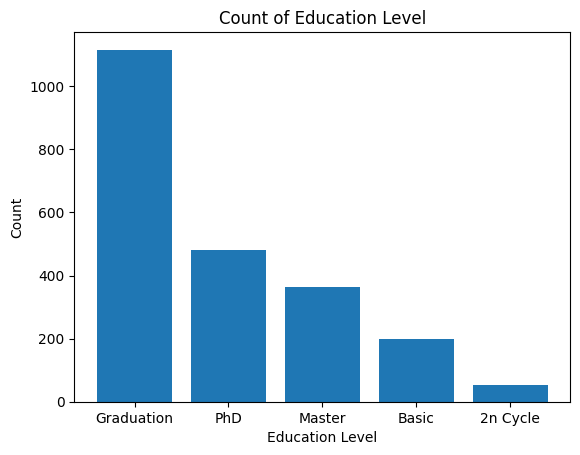

In [15]:
print("Count of Education by each level\n=================================")
print(df['Education'].value_counts())
plt.bar(df['Education'].unique() ,df['Education'].value_counts())
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Count of Education Level")
plt.show()

Count of Marital status by each level
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


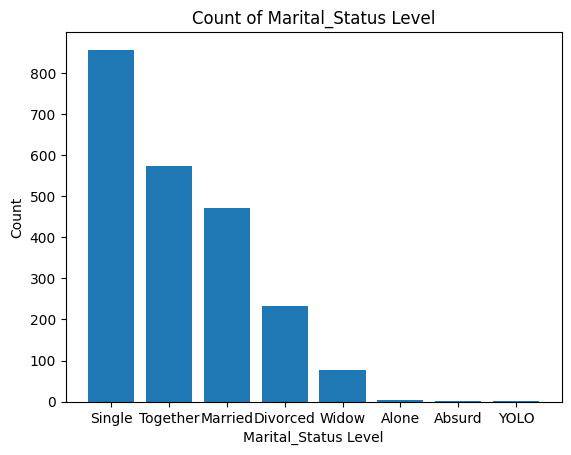

In [16]:
print("Count of Marital status by each level\n=====================================")
print(df['Marital_Status'].value_counts())
plt.bar(df['Marital_Status'].unique() ,df['Marital_Status'].value_counts())
plt.xlabel("Marital_Status Level")
plt.ylabel("Count")
plt.title("Count of Marital_Status Level")
plt.show()

<Axes: >

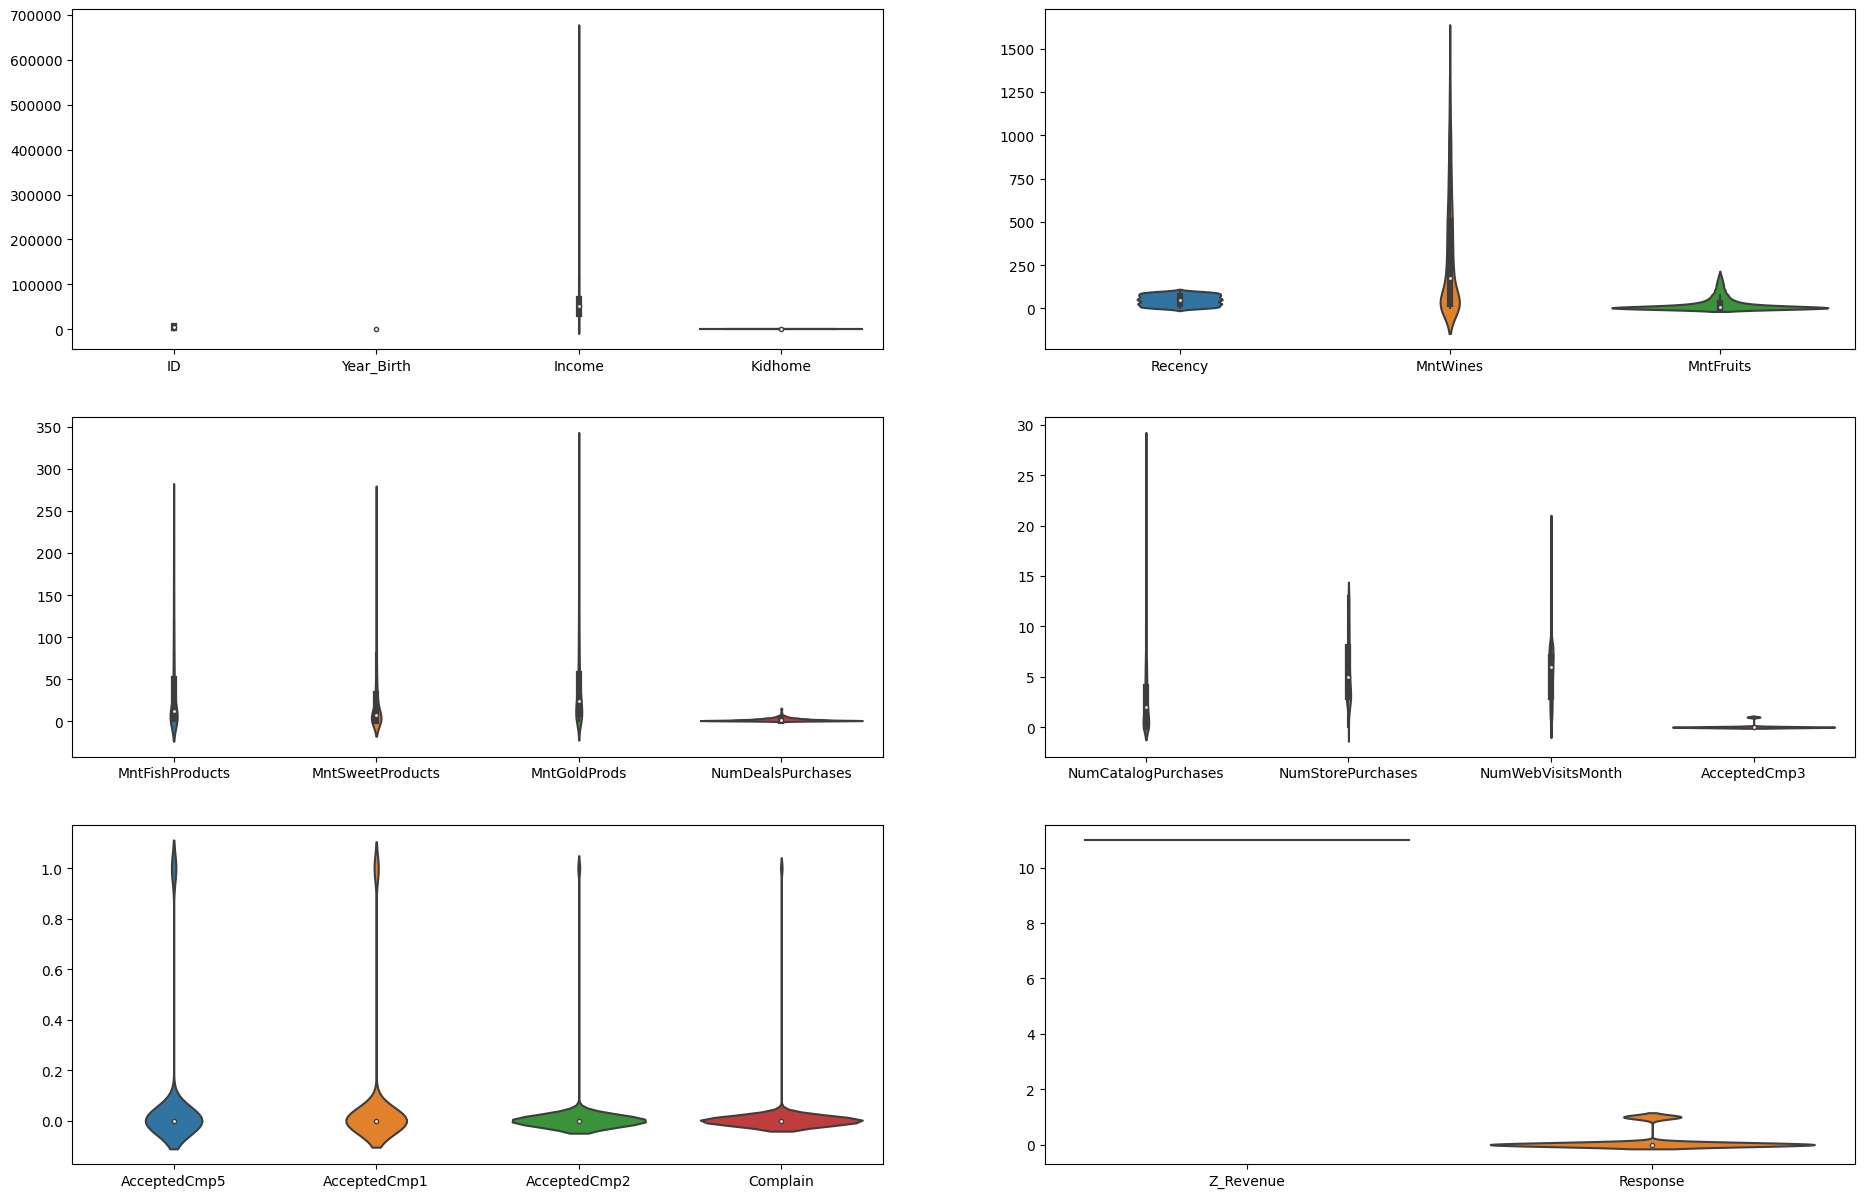

In [17]:
data = df.drop(object_columns, axis= 1)
fig , axes = plt.subplots(nrows = 3 , ncols = 2 , figsize = (23, 15))

sns.violinplot(data = data.iloc[:,0:4] , ax = axes[0,0])
sns.violinplot(data = data.iloc[:,5:9] , ax = axes[0,1])
sns.violinplot(data = data.iloc[:,10:14] , ax = axes[1,0])
sns.violinplot(data = data.iloc[:,15:19] , ax = axes[1,1])
sns.violinplot(data = data.iloc[:,20:24] , ax = axes[2,0])
sns.violinplot(data = data.iloc[:,25:29] , ax = axes[2,1])

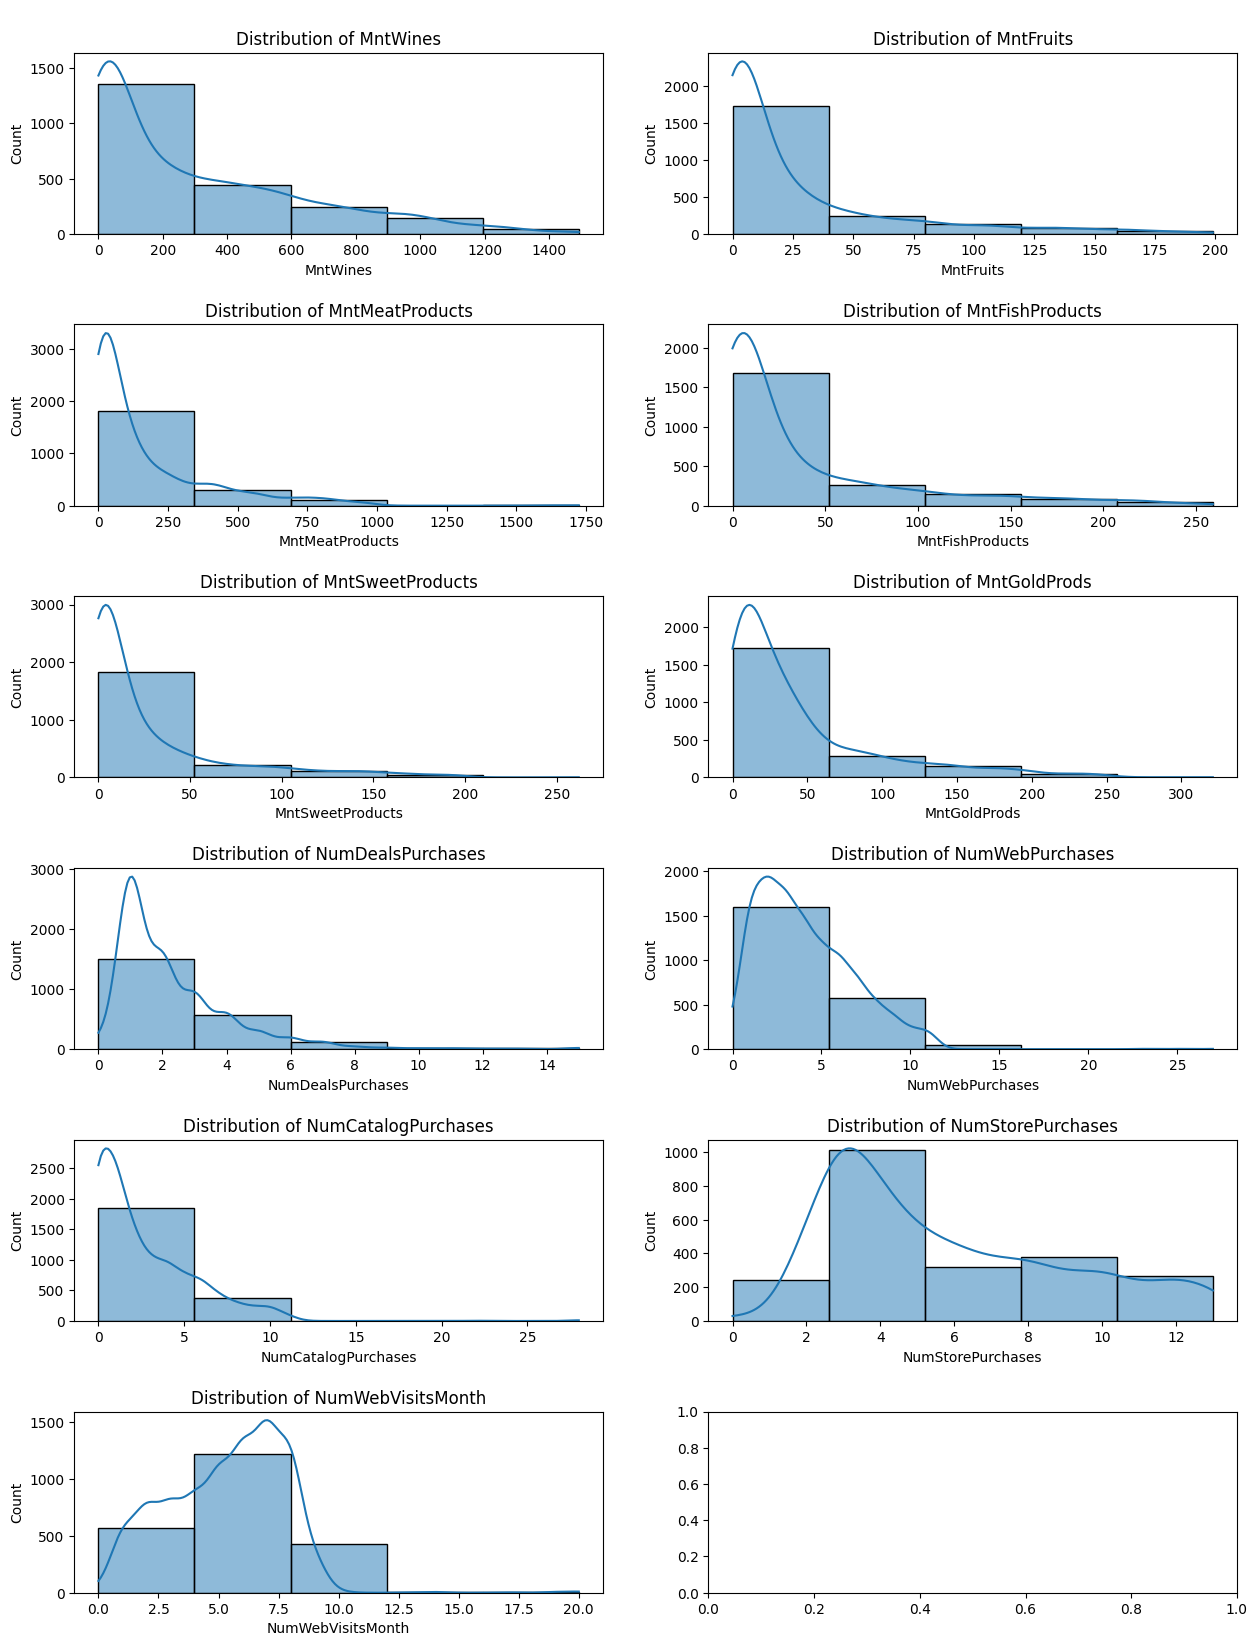

In [18]:
data = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
           'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
fig , axes = plt.subplots(nrows = 6 , ncols = 2 , figsize = (15 , 20))
plt.subplots_adjust(hspace=0.5) 

i,j = 0,0
for columm in data.columns:
    sns.histplot(data[columm] , kde= True , ax = axes[i,j] , bins= 5)
    axes[i,j].set_title(f'\nDistribution of {columm}')
    j += 1
    if j > 1 :
        j = 0
        i+=1

plt.show()


# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
print(" Label Encoding\n================")
for i in object_columns:
    final[i] = encoder.fit_transform(final[i])
final.head()

 Label Encoding


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,3.0,11.0,1.0,2,4,2012-09-04
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2,4,2014-03-08
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2,5,2013-08-21
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2,5,2014-02-10
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,4,3,2014-01-19


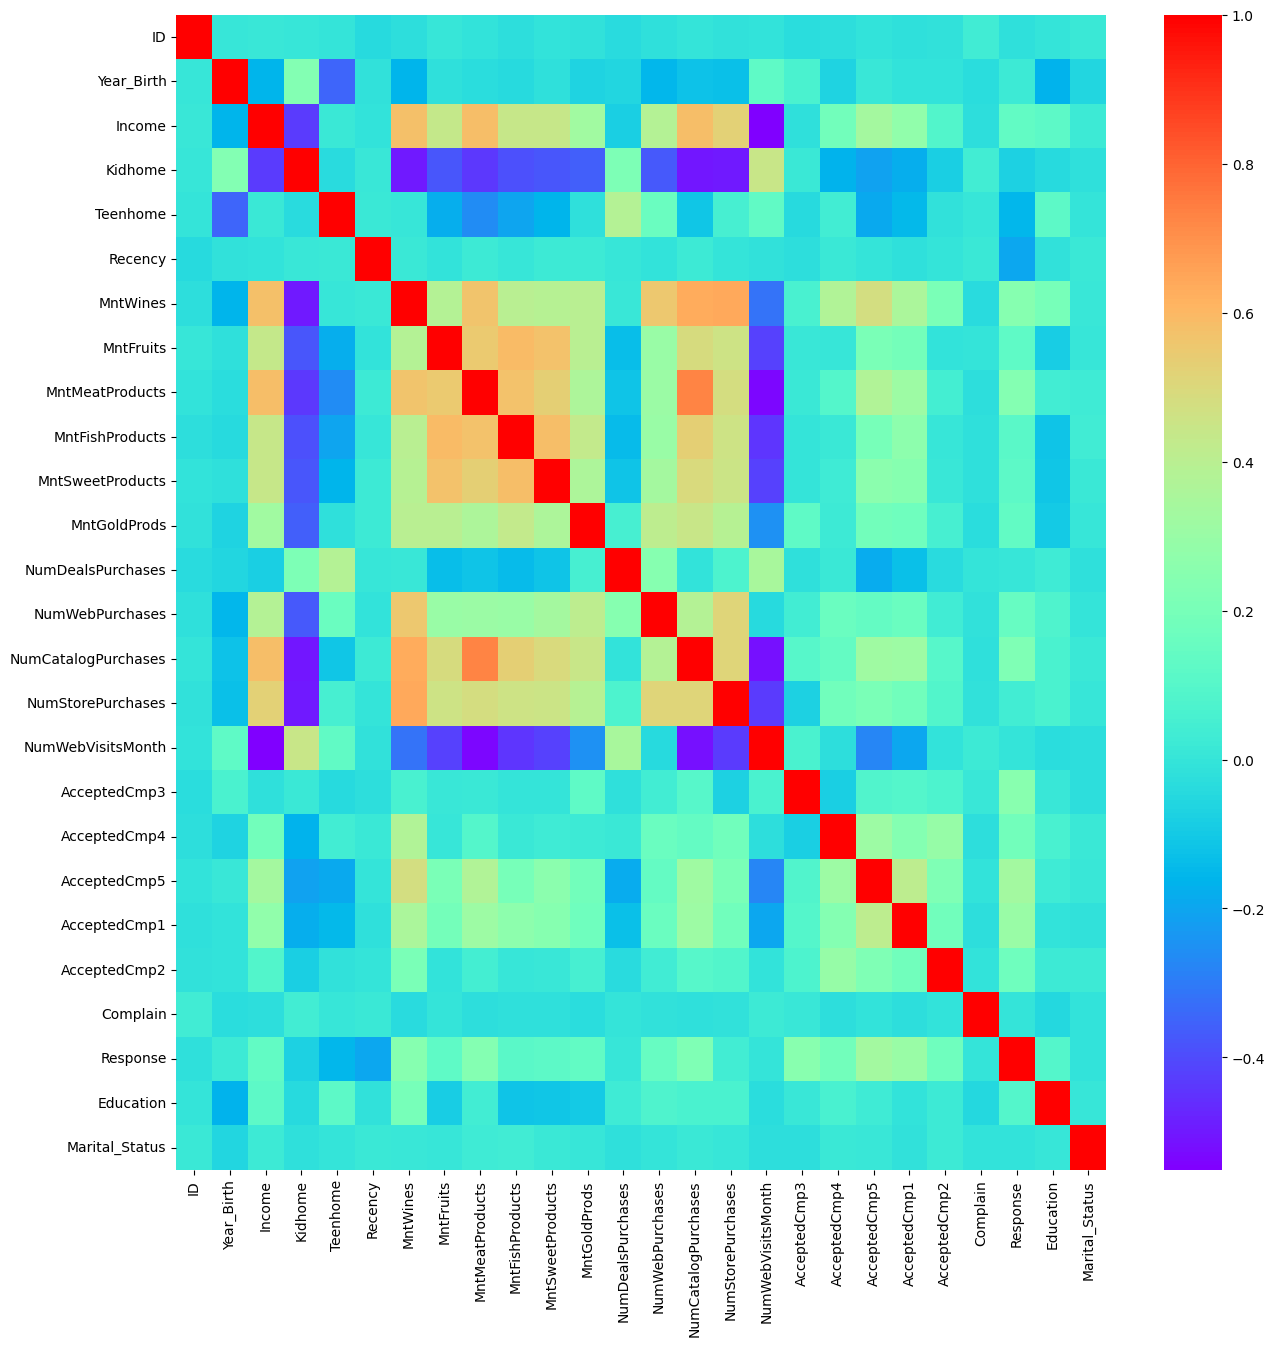

In [20]:
corr = final.drop(['Z_Revenue' , 'Dt_Customer' , 'Z_CostContact'] , axis = 1).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data = corr , annot= False , cmap="rainbow")
plt.show()

In [21]:
csv_file_path = os.path.join(data_folder, 'pre_processes_data.csv')
final.to_csv( csv_file_path, index=False)